In [311]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as py

In [312]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])

In [313]:
#網路架構(總共15個可調參數)
n_input = 2     #number of input
n_hid = 2       #number of neurons in hidden layer
n_hid_hid = 2   #number of neurons in hidden layer
n_output = 1    #number of output

In [314]:
def sigmoid (x):
    return 1/(1 + np.exp(-x))

In [315]:
def forward(x):      #x為一組參數組合(15個參數)

    w1 = x[0:4].reshape((n_input,n_hid)) 
    w2 = x[4:8].reshape((n_hid,n_hid_hid)) 
    w3 = x[8:10].reshape((n_hid_hid,n_output))
    b1 = x[10:12].reshape((n_hid,)) 
    b2 = x[12:14].reshape((n_hid_hid,))
    b3 = x[14].reshape((n_output,))

    z1 = np.dot(X,w1)+b1
    o1 = sigmoid(z1)       #第一層隱藏層輸出
    z2 = np.dot(o1,w2)+b2
    o2 = sigmoid(z2)       #第二層隱藏層輸出
    z3 = np.dot(o2,w3)+b3  
    o3 = sigmoid(z3)       #最後output
    
    error = np.sum((Y-o3)**2)      #計算square error
    return error

In [316]:
#定義PSO參數
pop_size = 30             #總共想設計幾組參數組合
dimemsion = 15            #每個組合的參數數量
max_iter = 100            # maximum number of iterations 

w = np.linspace(0.9, 0.4, max_iter)                   # Intertial weight.Set to vary with iteration number.

c1 = 2.0                  # Weight of searching based on the optima found by a particle
c2 = 2.0                  # Weight of searching based on the optima found by the swarm
    
pbest_val = np.zeros(pop_size)            # Personal best fintess value. One pbest value per particle.
gbest_val = np.zeros(max_iter)            # Global best fintess value. One gbest value per iteration (stored).

pbest = np.zeros((pop_size,dimemsion))      # pbest solution
gbest = np.zeros(dimemsion)                 # gbest solution

gbest_store = np.zeros((max_iter,dimemsion))   # storing gbest solution at each iteration

pbest_val_avg_store = np.zeros(max_iter)
fitness_avg_store = np.zeros(max_iter)

# x = np.random.rand(pop_size,dimemsion)           # Initial position of the particles
# x = np.random.randn(pop_size,dimemsion)          #隨機產生包含負數的值
x = np.random.uniform(-2,2,(pop_size,dimemsion))   #隨機產生-2~2的值
v = np.zeros((pop_size,dimemsion))                # Initial velocity of the particles


Iter. = 0 . gbest_val =  1.0025925119321526
Iter. = 1 . gbest_val =  1.0025925119321526
Iter. = 2 . gbest_val =  1.0025925119321526
Iter. = 3 . gbest_val =  1.0242212491581704
Iter. = 4 . gbest_val =  1.0242212491581704
Iter. = 5 . gbest_val =  1.0495426498846874
Iter. = 6 . gbest_val =  1.420280452944155
Iter. = 7 . gbest_val =  1.420280452944155
Iter. = 8 . gbest_val =  1.420280452944155
Iter. = 9 . gbest_val =  1.420280452944155
Iter. = 10 . gbest_val =  1.420280452944155
Iter. = 11 . gbest_val =  1.420280452944155
Iter. = 12 . gbest_val =  1.420280452944155
Iter. = 13 . gbest_val =  1.420280452944155
Iter. = 14 . gbest_val =  1.420280452944155
Iter. = 15 . gbest_val =  1.4882415140854839
Iter. = 16 . gbest_val =  1.4882415140854839
Iter. = 17 . gbest_val =  1.4882415140854839
Iter. = 18 . gbest_val =  1.4882415140854839
Iter. = 19 . gbest_val =  1.4882415140854839
Iter. = 20 . gbest_val =  1.4882415140854839
Iter. = 21 . gbest_val =  1.4882415140854839
Iter. = 22 . gbest_val =  1.4

C:\Users\angus\AppData\Local\Temp\ipykernel_20576\2485766485.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
C:\Users\angus\AppData\Local\Temp\ipykernel_20576\347070340.py:8: RuntimeWarning: overflow encountered in divide
  fitness = 1 / np.array(error)
C:\Users\angus\AppData\Local\Temp\ipykernel_20576\347070340.py:8: RuntimeWarning: divide by zero encountered in divide
  fitness = 1 / np.array(error)


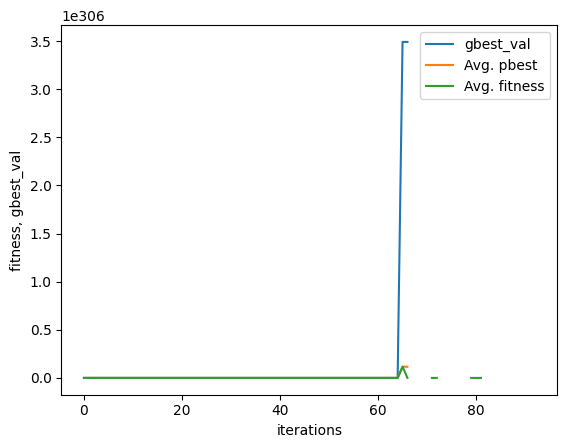

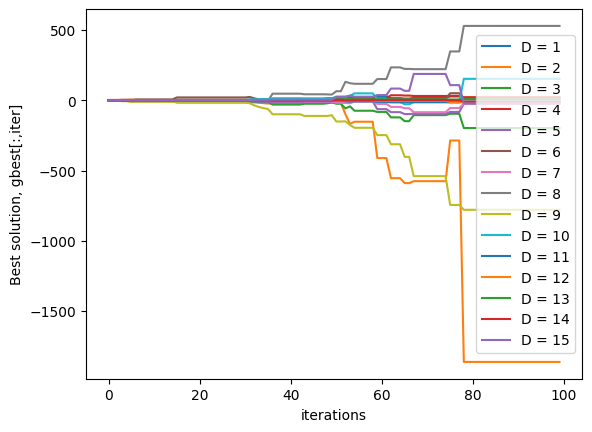

In [318]:
# Loop over the generations
for iter in range(0,max_iter):
    error = []
    fitness = []
    for i in range(pop_size):      #每次迭代先算出30組particle的fitness
        h = x[i,:]                 #h為每個pop的參數組合
        error.append(forward(h))
        fitness = 1 / np.array(error)
    
    if iter == 0:
        pbest_val = fitness            # initial personal best = initial fitness values. Vector of size 30
        pbest = x                   # initial pbest solution = initial position. Matrix of size 30*15
        
    else:
        # pbest and pbest_val update
        ind = np.argwhere(fitness > pbest_val)   # indices where current fitness value set is greater than pbset
        pbest_val[ind] = fitness[ind]   # update pbset_val at those particle indices where fit > pbest_val
        pbest[ind,:] = x[ind,:]     # update pbest for those particle indices where fit > pbest_val 
             
                    
    if iter > 0:                                      # Do not update postion for 0th iteration
        r1 = np.random.rand(pop_size,dimemsion)       # random numbers [0,1]
        r2 = np.random.rand(pop_size,dimemsion)       # random numbers [0,1]  
        v_global = np.multiply((gbest-x),r2)*c2       # velocity towards global optima
        v_local  = np.multiply((pbest-x),r1)*c1       # velocity towards local optima (pbest)
        
        v = w[iter]*v + (v_local + v_global)          # velocity update (w隨著迭代次數增加而下降)
        x = x + v                                     # position update
    
                
    # gbest and gbest_val update
    ind2 = np.argmax(pbest_val)              # index where the fitness is maximum
    gbest_val[iter] = pbest_val[ind2]        # 所有個體最佳解的最大值及為群體最佳解
    gbest = pbest[ind2,:]                    # global best solution, gbest
        
    gbest_store[iter,:] = gbest              # store gbest solution
        
    pbest_val_avg_store[iter] = np.mean(pbest_val)
    fitness_avg_store[iter] = np.mean(fitness)
    print("Iter. =", iter, ". gbest_val = ", gbest_val[iter])  # print iteration no. and best solution at each iteration
    
# Plotting
py.close('all')
py.plot(gbest_val,label = 'gbest_val')
py.plot(pbest_val_avg_store, label = 'Avg. pbest')
py.plot(fitness_avg_store, label = 'Avg. fitness')
py.legend()
#py.gca().set(xlabel='iterations', ylabel='fitness, gbest_val')

py.xlabel('iterations')
py.ylabel('fitness, gbest_val')

py.figure()
for m in range(dimemsion):
    py.plot(gbest_store[:,m],label = 'D = ' + str(m+1))
    
py.legend()
py.xlabel('iterations')
py.ylabel('Best solution, gbest[:,iter]')

#算出最後的輸出
w1 = gbest[0:4].reshape((n_input,n_hid)) 
w2 = gbest[4:8].reshape((n_hid,n_hid_hid)) 
w3 = gbest[8:10].reshape((n_hid_hid,n_output))
b1 = gbest[10:12].reshape((n_hid,)) 
b2 = gbest[12:14].reshape((n_hid_hid,))
b3 = gbest[14].reshape((n_output,))
z1 = np.dot(X,w1)+b1
o1 = sigmoid(z1)       #第一層隱藏層輸出
z2 = np.dot(o1,w2)+b2
o2 = sigmoid(z2)       #第二層隱藏層輸出
z3 = np.dot(o2,w3)+b3  #第三層隱藏層輸出
o3 = sigmoid(z3)

print(o3)
